In [ ]:
from importlib import reload
# from imp import reload
import matplotlib.pyplot as plt
from ipcv import cvlib, scanner

reload(cvlib)
reload(scanner)

In [ ]:
# A function to display side-by-side visuals for comparisons.
def display(source_img, cropped_img):
    # Display the previous and current side-by-side for visual comparison.
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(source_img, cmap='gray')
    plt.title('Source Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img, cmap='gray')
    plt.title('Cropped Image')

Image               : image-size=5,648,120, [RXC]=[1,676 X 3,370]
[1] --Binarize      : at min-thresh=80, black=96.00%, white=5.00%, thresh-cnt=0, limit-cnt=0
[1] --Iteration    : at iteration-rate=0.5, dilate-interation=22, erode-interation=11
---------->
Image Area          : 5,648,120, box=False
Min required area   : 282,406.00 (0.05 rate), should be > 5.00%
Number of contours  : 146

Calculated area    : 1.50, Coordinates (X,Y)=[A=([1540 1588]), B=([1542 1587]), C=([1549 1587]), D=([1540 1587])]

Calculated area    : 182.00, Coordinates (X,Y)=[A=([1783 1580]), B=([1783 1587]), C=([1809 1587]), D=([1809 1580])]
Calculated ratio   : 3.38

Calculated area    : 297.50, Coordinates (X,Y)=[A=([1310 1580]), B=([1310 1587]), C=([1354 1587]), D=([1354 1581])]
Calculated ratio   : 5.62

Calculated area    : 396.00, Coordinates (X,Y)=[A=([1869 1579]), B=([1869 1588]), C=([1913 1588]), D=([1913 1579])]
Calculated ratio   : 4.50

Calculated area    : 20.00, Coordinates (X,Y)=[A=([1659 1514]), B

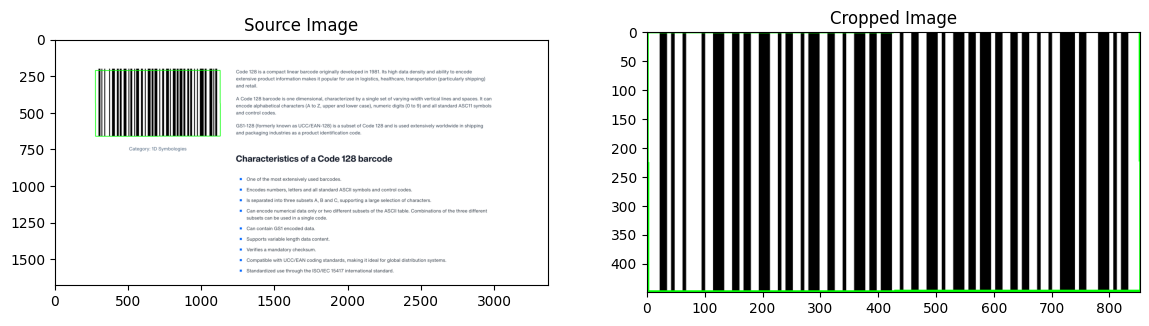

In [28]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode102.png')
cropped = scanner.detect_barcode_v2(image=image,
                                    gamma=1,
                                    gaussian_ksize=(3, 3),
                                    gaussian_sigma=1,
                                    thresh_min=80,
                                    attempt_limit=10,
                                    iteration=20,
                                    min_area_factor=0.05,
                                    box=False)
if cropped is not None:
    display(image, cropped)
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

Decoded barcode : None


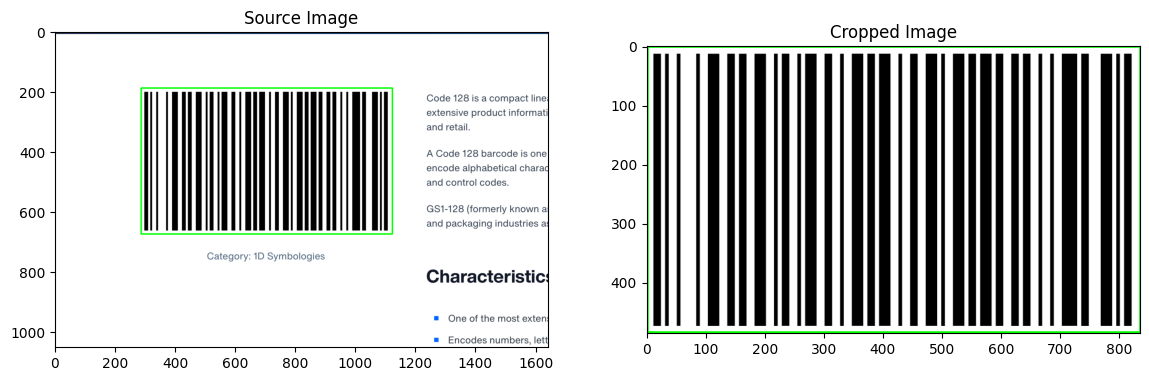

In [7]:
image = cvlib.load_image('resources/barcode/barcode101.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode102.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode111.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode113.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
# SE = [51,7] was used since [21,7] did not work.
image = cvlib.load_image('resources/barcode/barcode114.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[51, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
barcode = scanner.decode_barcode(cropped)
if barcode is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
else:
    cnt = 0
    for i in range(1, 50, 5):
        ksize = (21 + i, 7)
        print(f'Attempt [{cnt}] Increasing SE kernel {ksize} ...')
        cropped = scanner.detect_barcode(image=image,
                                         gamma=0.5,
                                         gaussian_ksize=(15, 15),
                                         gaussian_sigma=2,
                                         avg_ksize1=(9, 9),
                                         avg_ksize2=(3, 3),
                                         thresh_min=200,
                                         dilate_kernel=ksize,
                                         dilate_iteration=4,
                                         shrink_factor=6,
                                         offset=0)
        barcode = scanner.decode_barcode(cropped)
        if barcode is not None:
            print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
            break

In [ ]:
image = cvlib.load_image('resources/barcode/barcode121.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode310.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode320.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode330.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
barcode = scanner.decode_barcode(cropped)
if barcode is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
else:
    cnt = 0
    for i in range(1, 50, 5):
        ksize = (21 + i, 7)
        print(f'Attempt [{cnt}] Increasing SE kernel {ksize} ...')
        cropped = scanner.detect_barcode(image=image,
                                         gamma=0.5,
                                         gaussian_ksize=(15, 15),
                                         gaussian_sigma=2,
                                         avg_ksize1=(9, 9),
                                         avg_ksize2=(3, 3),
                                         thresh_min=200,
                                         dilate_kernel=(21, 7),
                                         dilate_iteration=4,
                                         shrink_factor=6,
                                         offset=0)
        barcode = scanner.decode_barcode(cropped)
        if barcode is not None:
            print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
            break
